<a href="https://colab.research.google.com/github/XiadaniCue/Simulaci-n-1/blob/main/M%C3%A9todo_de_Composici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Método de Composición**


1.   Dividir la distribución en sub-áreas.
2.   Definir una distribución para cada sub-área.
3.   Escribir: $f(x)=A_1f_1(x)+A_2 f_2(x) +...+ A_nf_n(x)=1$
4.   Obtener la distribución acumulada de las áreas.
5.   Generar $R_1,R_2 \sim U$.
6.   Seleccionar la distribución $f_i(x)$ con la que se va a simular $x$.
7.   Usar $R_2$ para generar $x$.




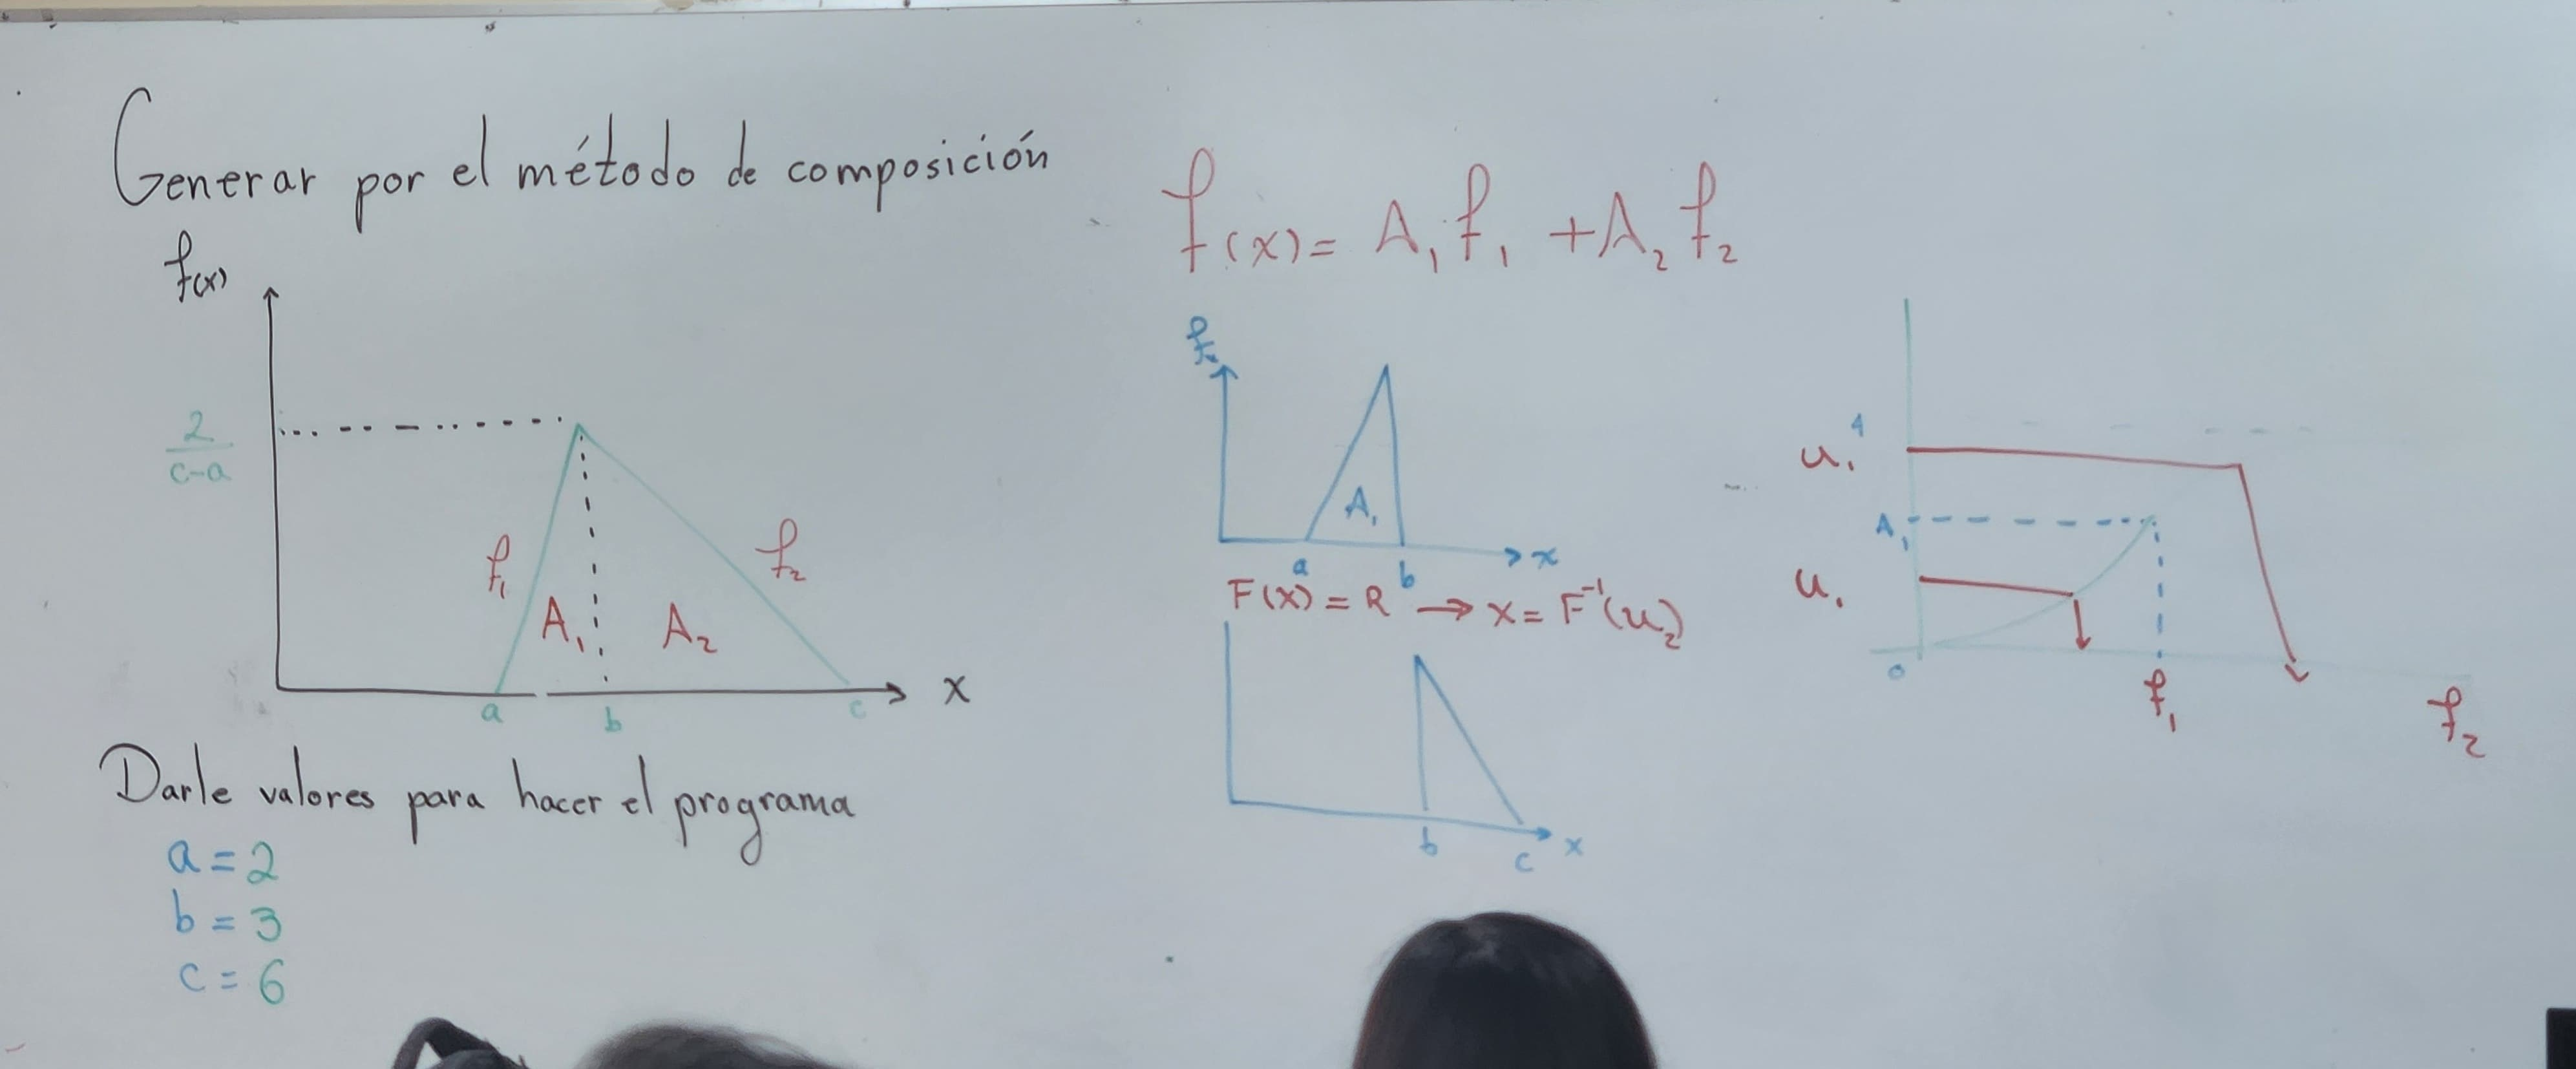

Valores para hacer el programa:

a=2 ; b=5 ; c=8

$$f(x)=A_{1}f{1}+A_{2}f_{2}$$

1. Dvidimos $f(x)$ en 2: $f_{1}(x)$ & $f_{2}(x)$

Para $f_{1}(x)$:
$$m=\frac{ y_{2}-y_{1} }{ x_{2}-x_{1} }=\frac{ \frac{2}{c-a} - 0}{ b-a }$$

Recordando la forma de calcular una ecuación lineal (recta):
$$y-y_{1}=m(x-x_1)$$
$$y→f$$

Obtenemos:
$${f_{1}(x)= \frac{2}{(c-a)(b-a)}(x-a)}$$

*Otra forma*

Como sabemos que $f_{1}$ es lineal:
$$f_1(x)=mx+n$$
Entonces sustituimos para $(a,0)=(x,y)$ & $(b,\frac{2}{c-a})$ y obtenemos:


$$ ma+n=0 \\ mb+n=\frac{2}{c-a}$$

Resolvemos para m y n:
$$f_1(x)= \frac{2}{(c-a)(b-a)}(x-a) \quad \text{si } a≤x≤b$$
Calculamos el área:
$$A_1= \frac{(b-a)( \frac{2}{c-a})}{2} \\ {A_1= \frac{b-a}{c-a}}$$

De manera análoga para $f_2(x)$
$$m= \frac{0- \frac{2}{c-a}}{c-b} = -\frac{2}{(c-a)(c-b)} \\ {f_2(x)=- \frac{2}{(c-a)(b-a)}(x-a) + \frac{2}{c-a}} \quad \text{para } b≤x≤c$$

Y su área:
$$A_2=\frac{(c-b)( \frac{2}{c-a})}{2} \\{A_2= \frac{c-b}{c-a}}$$

Verificar:
$$A_1 + A_2 = \frac{b-a}{c-a} + \frac{c-b}{c-a}=\frac{c-a}{c-a}=1$$

Escribimos nuestra $f(x)$ como:
$$f(x)=A_1f_1(x)+A_2 f_2(x)$$
$$f(x)=\Bigl(\frac{b-a}{c-a}\Bigl) \Bigl(\frac{2(x-a)}{(c-a)(c-b)}\Bigl)+\Bigl(\frac{c-b}{c-a}\Bigl) \Bigl(\frac{-2(x-b)}{(c-a)(c-b)}+\frac{2}{c-a}\Bigl)$$


Calculamos su función acumulativa y usamos el método de transformada inversa:
$$F_1(x)=\int_{a}^{x} A_1 f_1(s)ds= \frac{(x-a)^2}{(c-a)^2}$$
para $a ≤x≤b$
Su inversa
$$x=a+(c-a)\sqrt{R_2}$$

$$F_2(x)=\int_{a}^{x} A_2 f_2(s)ds= 1-\frac{(x-c)^2}{(c-b)^2}$$
para $b≤x≤c$
Su inversa
$$x=c-(c-b)\sqrt{R_2}$$

In [60]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [61]:
def fun(n,a,b,c):
  lista=[]
  for k in range(n):
    R1=rnd.random()
    R2=rnd.random()
    if 0<=R1<((b-a)/(c-a)):
      x=a+(c-a)*np.sqrt(R2)
      lista.append(x)
    elif ((b-a)/(c-a))<=R1<=1.0:
      x=c-(c-b)*np.sqrt(R2)
      lista.append(x)

  return lista

In [62]:
C=fun(500,2,5,8)

In [63]:
#Calculamos la media
mu=np.mean(C)
print(mu)

5.995194210658727


In [64]:
#calculamos la varianza
sigma2=np.var(C)
print(sigma2)

1.408301388645148


Text(0.5, 1.0, 'Gráfica de densidad')

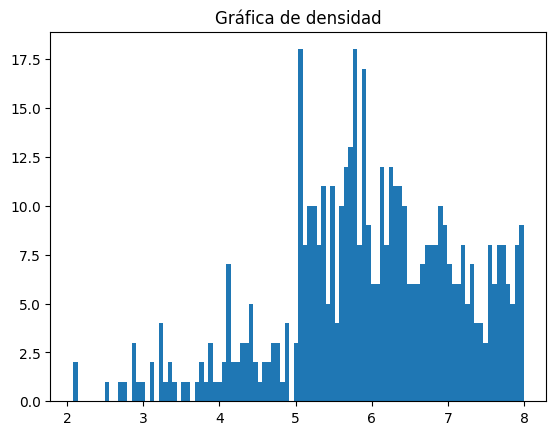

In [65]:
#El histograma nos ordena nuestros números por categorías

plt.hist(C, bins=100)
plt.title("Gráfica de densidad")

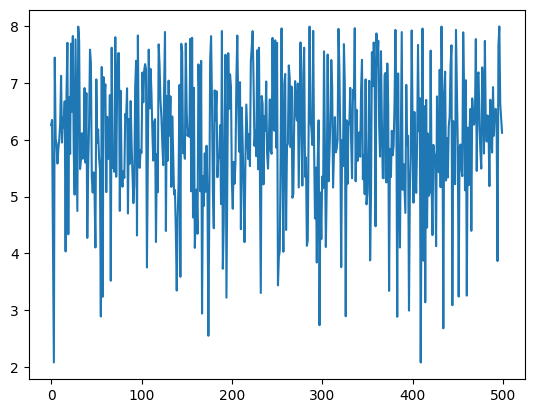

In [66]:
#Se gráfica la secuencia de los números
plt.plot(C)

In [67]:
#Hacemos nuestra gráfica acumulativa

def cdf(m):
  n=len(m)
  x=np.sort(m)
  y=np.arange(0,n)/n

  return x,y

In [68]:
X,Y=cdf(C)

Text(0.5, 1.0, 'FunciónAcumulativa')

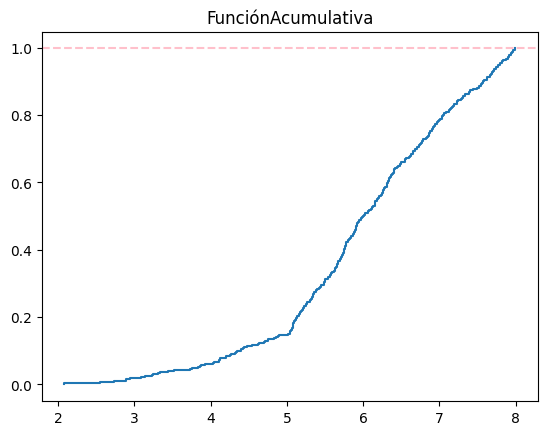

In [69]:
plt.step(X,Y)
plt.axhline(1, color="pink", linestyle="--")
plt.title('FunciónAcumulativa')